# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
combined_df.head()

# Display the data table for preview
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_ID) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

grouped_by_drug_df = combined_df.groupby(['Drug Regimen'])


mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stats = pd.DataFrame({'Mean Tumor Volume':mean,
                              'Median Tumor Volume':median,
                              'Tumor Volume Variance':var,
                              'Tumor Volume Standard Deviation':std,
                              'Tumor Volume SEM':sem})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregate_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

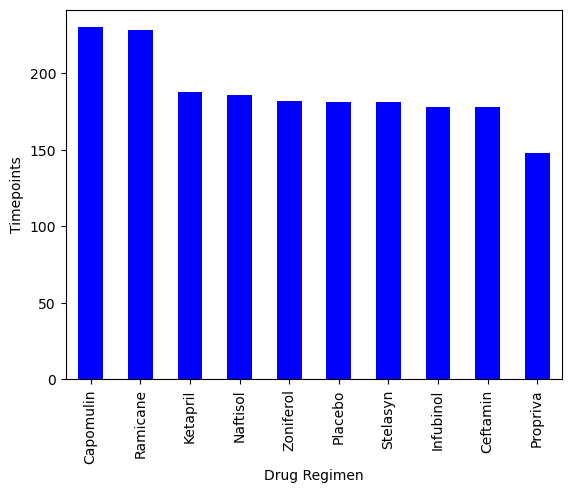

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count
plot_pandas = mice_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()


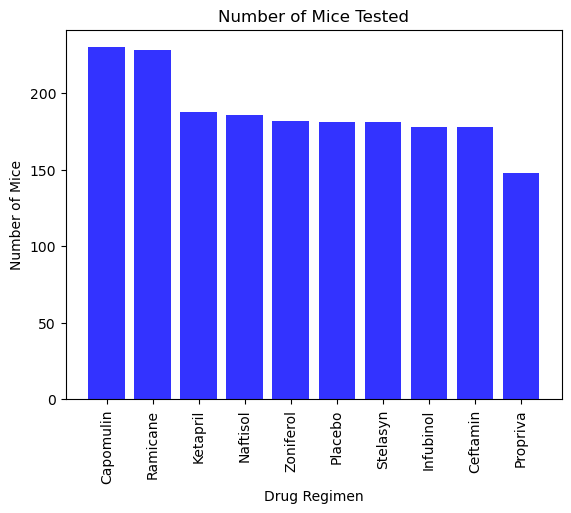

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title('Number of Mice Tested')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation = 'vertical')

plt.show()

<Axes: title={'center': 'Female Mice vs. Male Mice'}, ylabel='count'>

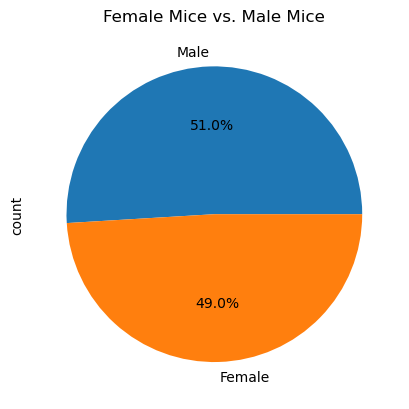

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_df['Sex'].value_counts()
plt.title('Female Mice vs. Male Mice')
mice_gender.plot.pie(autopct = '%1.1f%%')

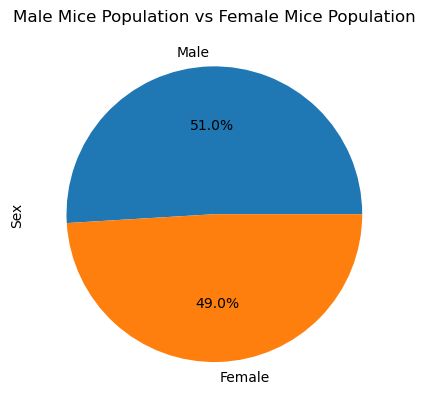

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female Mice', 'Male Mice']
plt.pie(mice_gender.values,labels=mice_gender.index.values, autopct="%1.1f%%")
plt.title('Male Mice Population vs Female Mice Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
max_tumor = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_tumor = max_tumor.reset_index()
merged_data = max_tumor.merge(clean_df, on=["Mouse ID","Timepoint"], how = "left")
merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [28]:
treatment_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
tumor_vol_list = []
for drug in treatment_list:

    final_tumor_vol  = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_list.append(final_tumor_vol)

    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol> upper_bound)]
    print(f"{drug}'s outlier: {outliers}")

Capomulin's outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


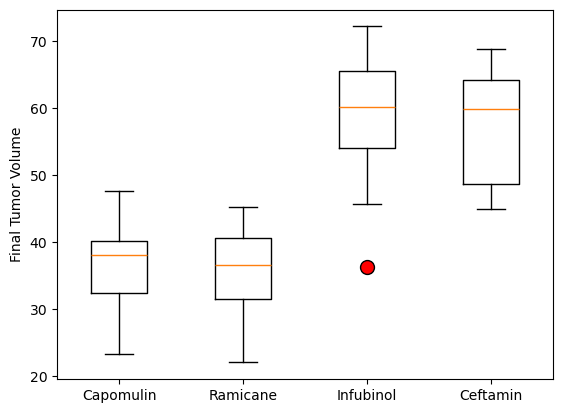

In [29]:
out_format = dict(markerfacecolor = "red", markersize = 10)
plt.boxplot(tumor_vol_list, labels=treatment_list,flierprops=out_format)
plt.ylabel("Final Tumor Volume")
plt.show();

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
Ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane',:]
Infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol',:]
Ceftamin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on = ('Mouse ID', 'Timepoint'), how = 'left')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [20]:
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on = ('Mouse ID', 'Timepoint'), how = 'left')
Ramicane_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [16]:
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on = ('Mouse ID', 'Timepoint'), how = 'left')

Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [21]:
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on = ('Mouse ID', 'Timepoint'), how = 'left')

Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

Capomulin_Tumors = Capomulin_merge["Tumor Volume (mm3)"]              
quartiles = Capomulin_Tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

Ramicane_Tumors = Ramicane_merge["Tumor Volume (mm3)"]              
quartiles = Ramicane_Tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

Infubinol_Tumors = Infubinol_merge["Tumor Volume (mm3)"]              
quartiles = Infubinol_Tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

Ceftamin_Tumors = Ceftamin_merge["Tumor Volume (mm3)"]              
quartiles = Ceftamin_Tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"...................................................................")
print(f"The lower quartile of Capomulin Tumors: {lowerq}")
print(f"The upper quartile of Capomulin Tumors: {upperq}")
print(f"The interquartile range of Capomulin Tumors: {iqr}")
print(f"The median of Capomulin Tumors: {quartiles[0.5]}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values below {upper_bound} could be outliers.") 
print(f".......................................................................")
print(f"The lower quartile of Ramicane Tumors: {lowerq}")
print(f"The upper quartile of Ramicane Tumors: {upperq}")
print(f"The interquartile range of Ramicane Tumors: {iqr}")
print(f"The median of Ramicane Tumors: {quartiles[0.5]}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values below {upper_bound} could be outliers.")
print(f"...................................................................")
print(f"The lower quartile of Infubinol Tumors: {lowerq}")
print(f"The upper quartile of Infubinol Tumors: {upperq}")
print(f"The interquartile range of Infubinol Tumors: {iqr}")
print(f"The median of Infubinol Tumors: {quartiles[0.5]}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values below {upper_bound} could be outliers.")
print(f"...................................................................")
print(f"The lower quartile of Ceftamin Tumors: {lowerq}")
print(f"The upper quartile of Ceftamin Tumors: {upperq}")
print(f"The interquartile range of Ceftamin Tumors: {iqr}")
print(f"The median of Ceftamin Tumors: {quartiles[0.5]}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values below {upper_bound} could be outliers.")
print(f"...................................................................")


NameError: name 'Infubinol_merge' is not defined

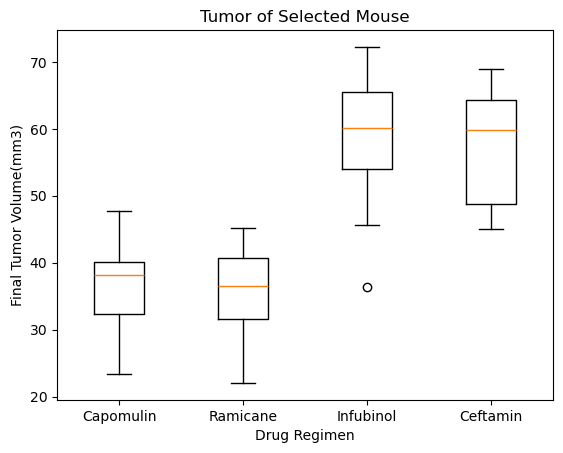

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_data = [Capomulin_Tumors, Ramicane_Tumors, Infubinol_Tumors, Ceftamin_Tumors]
Drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
figl, axl = plt.subplots()
axl.set_title("Tumor of Selected Mouse")
axl.set_ylabel("Final Tumor Volume(mm3)")
axl.set_xlabel("Drug Regimen")
axl.boxplot(boxplot_data, labels = Drug_Regimen, widths = 0.4, vert = True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

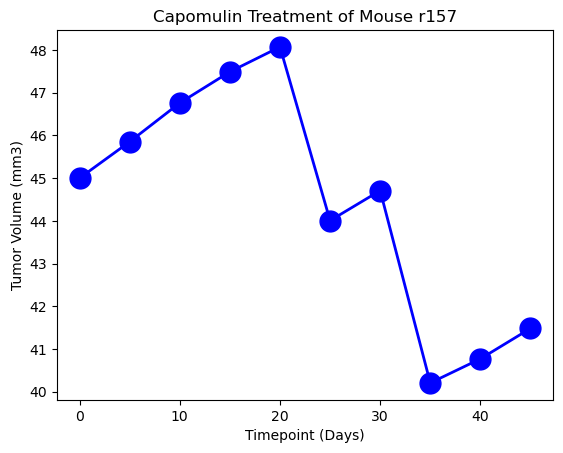

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_data= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_data = cap_data.loc[cap_data["Mouse ID"] == "l509"]

plt.title('Capomulin Treatment of Mouse r157')
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor Volume (mm3)"], linewidth = 2, markersize = 15, marker = 'o', color = 'blue')
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

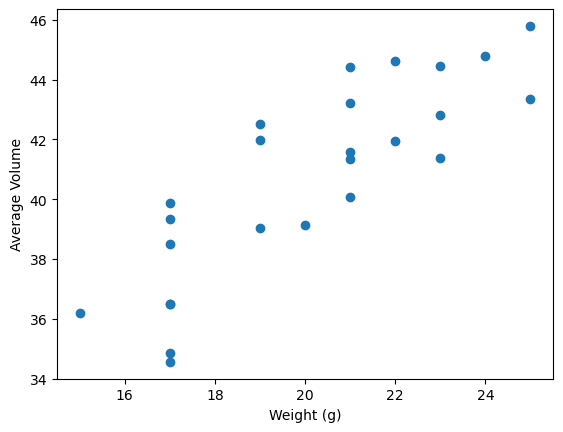

In [34]:
cap_table = cap_data
cap_avg = cap_table.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Volume")
plt.show();
    

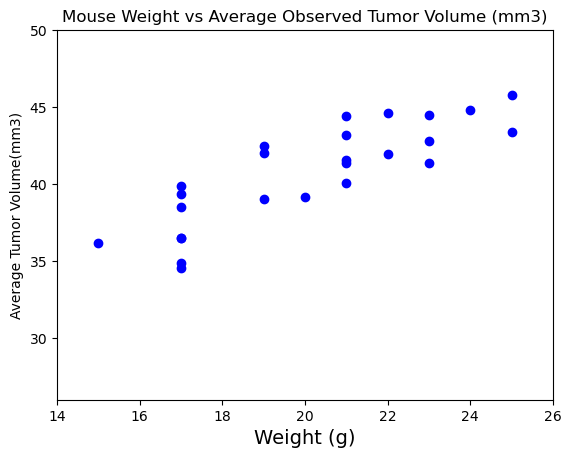

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

figl,axl = plt.subplots()
Average_Capomulin_Volume = Capomulin_df.groupby(['Mouse ID'])[["Weight (g)","Tumor Volume (mm3)"]].mean()
marker_size = 15
plt.scatter(Average_Capomulin_Volume['Weight (g)'], Average_Capomulin_Volume['Tumor Volume (mm3)'], color = 'blue')
plt.title('Mouse Weight vs Average Observed Tumor Volume (mm3)')
plt.xlabel('Weight (g)', fontsize = 14)
plt.ylabel('Average Tumor Volume(mm3)')
plt.xlim(14,26)
plt.ylim(26,50)
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [36]:
corr = round(st.pearsonr(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])[0],2)
model = st.linregress(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])

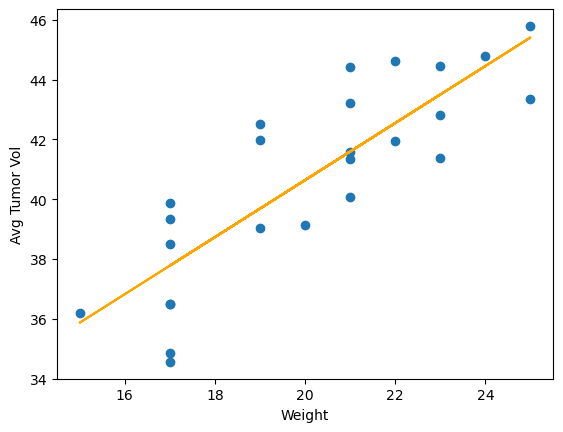

In [38]:
y_values = cap_avg["Weight (g)"] * model[0] + model[1]
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.plot(cap_avg["Weight (g)"],y_values, color="orange")
plt.xlabel("Weight")
plt.ylabel("Avg Tumor Vol")
plt.show();